In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import OrdinalEncoder
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
# cargar datos
df = pd.read_csv('Dataset_Videogames.csv', sep=';')

g = nx.Graph()

# añadir nodos al grafo
for i, row in df.iterrows():
    g.add_node(i, label=row['Label'],name=row['Name'], genre=row['Genre'], publisher=row['Publisher'], platform=row['Platform'])

In [ ]:
n = len(df)
for i in range(n):
    for j in range(i+1, n):
        weight = 0
        if df.iloc[i]['Genre'] == df.iloc[j]['Genre'] and df.iloc[i]['Publisher'] == df.iloc[j]['Publisher'] and df.iloc[i]['Platform'] == df.iloc[j]['Platform']:
            weight = 1
        elif df.iloc[i]['Genre'] == df.iloc[j]['Genre'] and df.iloc[i]['Publisher'] == df.iloc[j]['Publisher']:
            weight = 2
        elif df.iloc[i]['Genre'] == df.iloc[j]['Genre']:
            weight = 3


        if weight > 0:
          g.add_edge(i, j, weight=weight)


In [ ]:
nx.write_edgelist(g, 'Relation_Games.csv', delimiter=';', data=['weight'])

In [ ]:
# definir posición de los nodos usando spring layout
pos = nx.spring_layout(g)

{0: Text(0.11056302487850189, -0.16529580950737, 'G0001'),
 1: Text(0.27224597334861755, 0.10416077822446823, 'G0002'),
 2: Text(0.28704166412353516, -0.04979995638132095, 'G0003'),
 3: Text(0.09933961182832718, -0.17011778056621552, 'G0004'),
 4: Text(0.2663530707359314, 0.335713267326355, 'G0005'),
 5: Text(0.3254145681858063, 0.19205845892429352, 'G0006'),
 6: Text(0.2693553566932678, 0.10707468539476395, 'G0007'),
 7: Text(-0.04858241230249405, 0.17096857726573944, 'G0008'),
 8: Text(0.31843870878219604, 0.10569284856319427, 'G0009'),
 9: Text(-0.016073495149612427, -0.019943442195653915, 'G0010'),
 10: Text(0.053007908165454865, -0.05890320986509323, 'G0011'),
 11: Text(0.2655031085014343, -0.0959002897143364, 'G0012'),
 12: Text(0.2560768723487854, 0.32554471492767334, 'G0013'),
 13: Text(0.11984141170978546, -0.15514734387397766, 'G0014'),
 14: Text(0.09719374775886536, -0.17328396439552307, 'G0015'),
 15: Text(-0.37467142939567566, -0.03339385613799095, 'G0016'),
 16: Text(-0.2

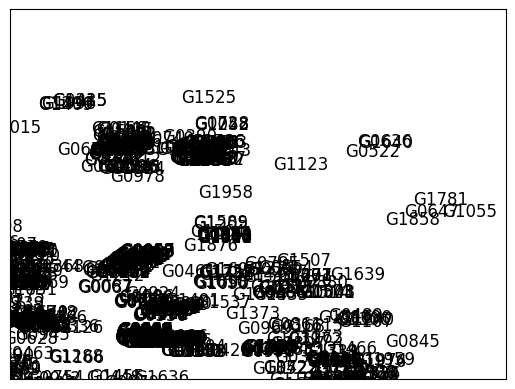

In [ ]:
# dibujar etiquetas de nodos
labels = nx.get_node_attributes(g, 'label')
nx.draw_networkx_labels(g, pos, labels)

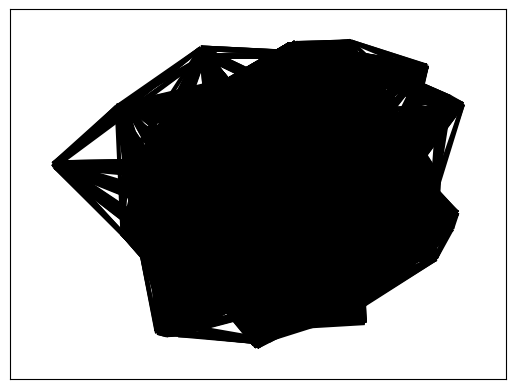

In [ ]:
# dibujar aristas con anchura proporcional al peso
weights = nx.get_edge_attributes(g, 'weight')
nx.draw_networkx_edges(g, pos, width=[weights[edge] * 1 for edge in g.edges()])

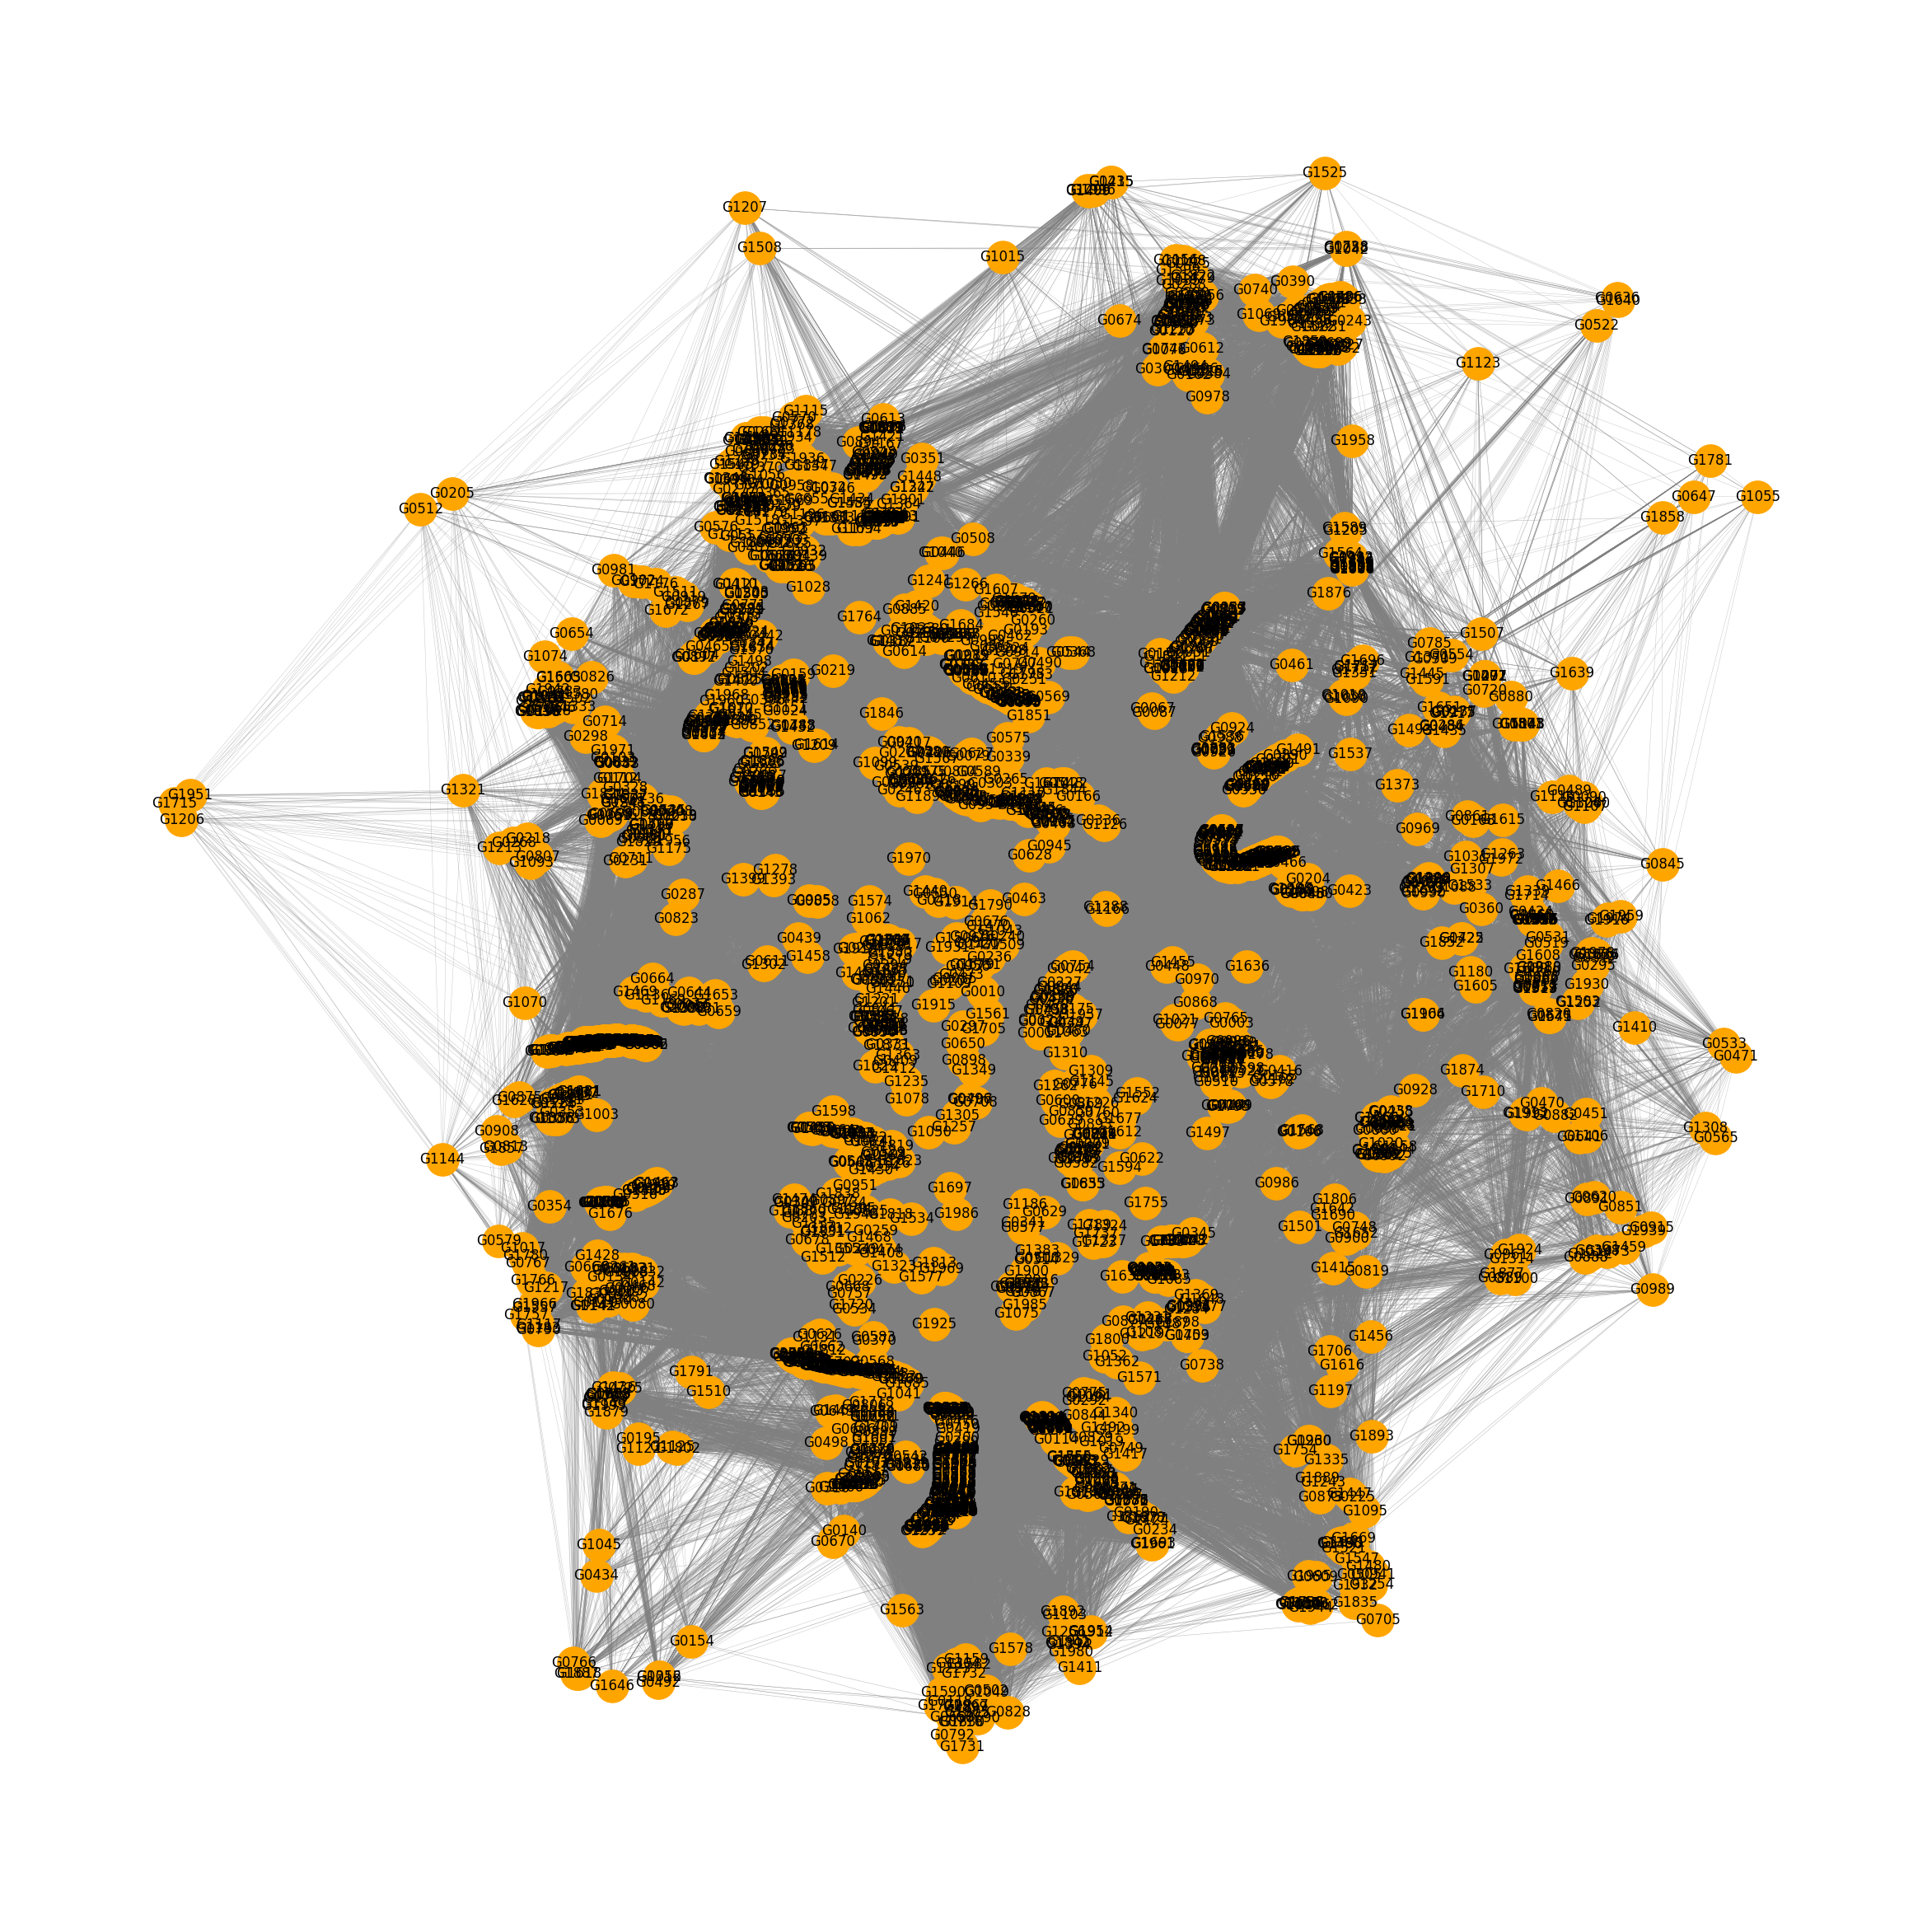

In [ ]:
plt.figure(figsize=(30, 30))  # ajustar el tamaño del gráfico según tus necesidades
nx.draw_networkx_nodes(g, pos, node_size=800, node_color='orange')
nx.draw_networkx_labels(g, pos, labels)
nx.draw_networkx_edges(g, pos, width=[weights[edge] * 0.1 for edge in g.edges()], edge_color = 'gray', alpha=0.5)
plt.axis('off')
plt.show()